# Módulo 10 tarefa 03
Considere a mesma base de dados utilizada na tarefa 1 ```previsao_de_renda.csv```.

1) Construa um gráfico de barras para avaliar a distribuição das variáveis qualitativas no tempo. Você acha que houve alguma alteração importante a ser investigada?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\marci\Desktop\Márcio\Programação\EBAC\02 - Phyton\4 - Desenvolvimento de aplicações com Python\Mod 10\previsao_de_renda.csv")

df.head()

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


In [4]:
df_qualitativas = df.select_dtypes(include=['object'])

df_qualitativas.head()

,data_ref,sexo,tipo_renda,educacao,estado_civil,tipo_residencia
0,2015-01-01,F,Assalariado,Secundário,Casado,Casa
1,2015-01-01,M,Empresário,Secundário,Casado,Casa
2,2015-01-01,M,Assalariado,Superior completo,Casado,Casa
3,2015-01-01,F,Empresário,Secundário,Casado,Casa
4,2015-01-01,M,Assalariado,Secundário,Casado,Casa


In [5]:
df_qualitativas

,data_ref,sexo,tipo_renda,educacao,estado_civil,tipo_residencia
0,2015-01-01,F,Assalariado,Secundário,Casado,Casa
1,2015-01-01,M,Empresário,Secundário,Casado,Casa
2,2015-01-01,M,Assalariado,Superior completo,Casado,Casa
3,2015-01-01,F,Empresário,Secundário,Casado,Casa
4,2015-01-01,M,Assalariado,Secundário,Casado,Casa
...,...,...,...,...,...,...
14995,2016-03-01,M,Assalariado,Secundário,Casado,Casa
14996,2016-03-01,M,Servidor público,Superior completo,Casado,Estúdio
14997,2016-03-01,F,Assalariado,Secundário,Casado,Casa
14998,2016-03-01,F,Servidor público,Superior completo,Casado,Casa


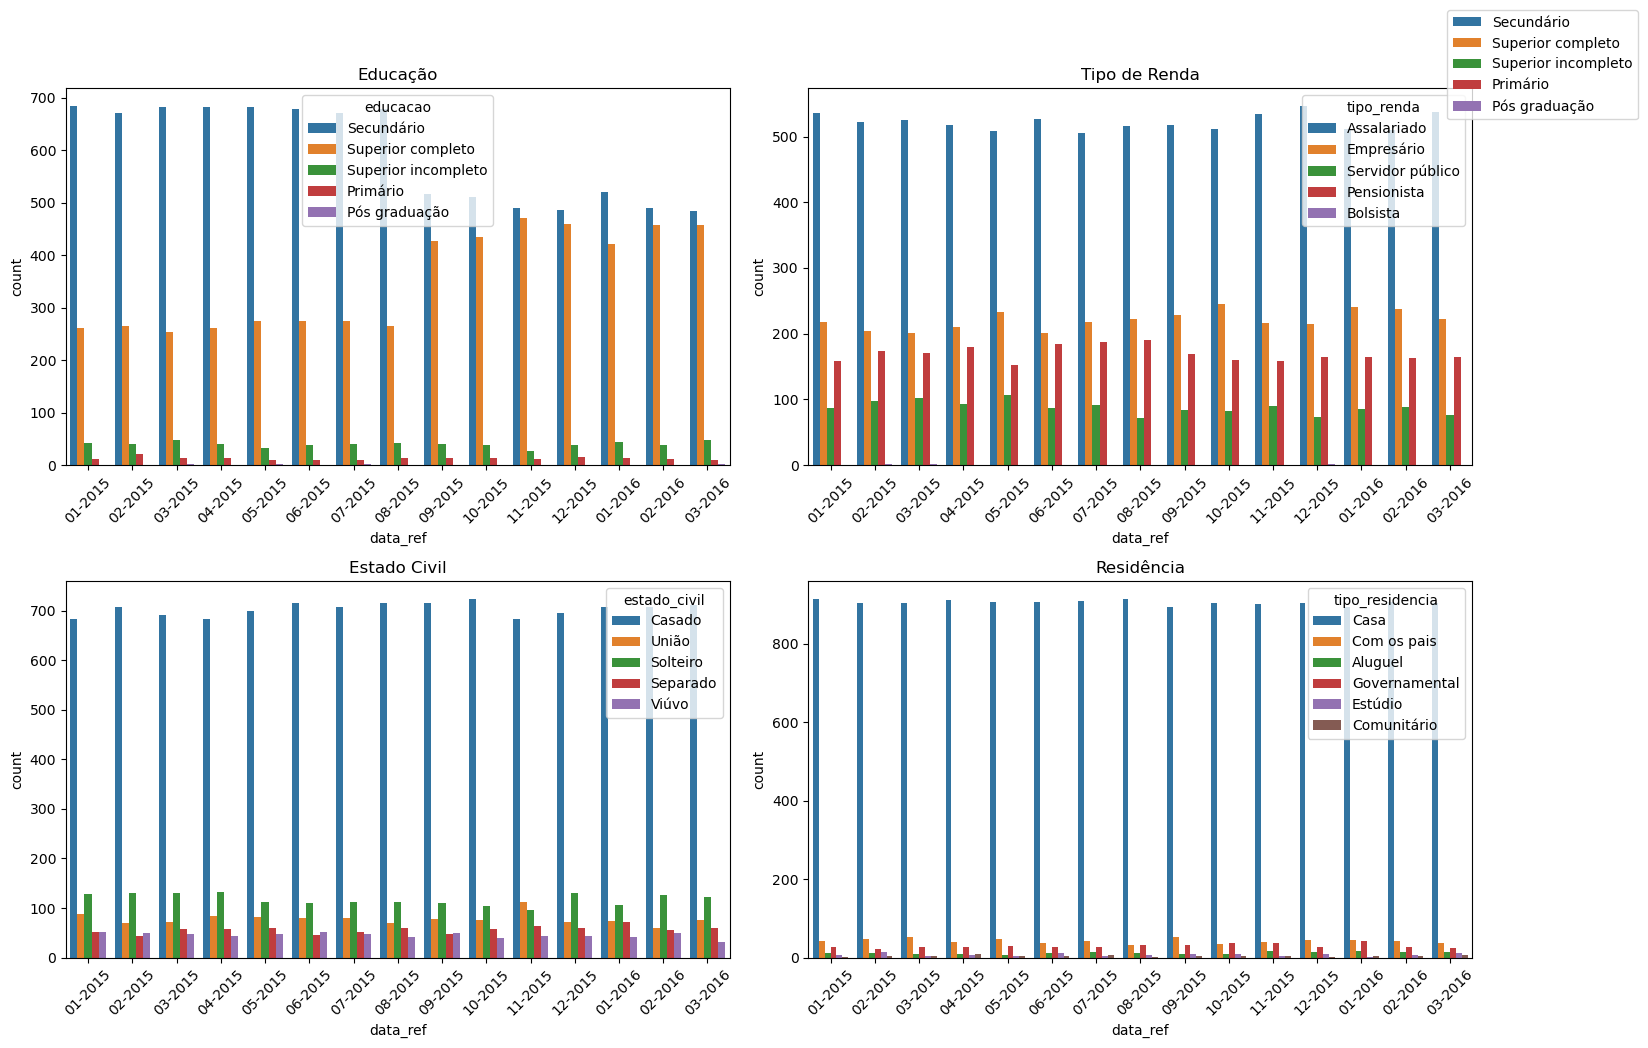

In [13]:
df_qualitativas['data_ref'] = pd.to_datetime(df_qualitativas['data_ref'], errors='coerce')

# Criando uma figura com 2 linhas e 2 colunas
fig, axes = plt.subplots(2, 2, figsize=(15, 10))  

# Ajustando os rótulos do eixo X
tick_labs = df_qualitativas['data_ref'].dropna().dt.strftime("%m-%Y").unique()

# Primeiro gráfico - Distribuição por educação
ax1 = sns.countplot(x='data_ref', hue='educacao', data=df_qualitativas, ax=axes[0, 0])
ax1.set_xticks(range(len(tick_labs)))
ax1.set_xticklabels(tick_labs, rotation=45)
ax1.set_title("Educação")

# Segundo gráfico - Distribuição por tipo de renda
ax2 = sns.countplot(x='data_ref', hue='tipo_renda', data=df_qualitativas, ax=axes[0, 1])
ax2.set_xticks(range(len(tick_labs)))
ax2.set_xticklabels(tick_labs, rotation=45)
ax2.set_title("Tipo de Renda")

# Terceiro gráfico - Distribuição por estado civil
ax3 = sns.countplot(x='data_ref', hue='estado_civil', data=df_qualitativas, ax=axes[1, 0])
ax3.set_xticks(range(len(tick_labs)))
ax3.set_xticklabels(tick_labs, rotation=45)
ax3.set_title("Estado Civil")

# Quarto gráfico - Distribuição por tipo de residência
ax4 = sns.countplot(x='data_ref', hue='tipo_residencia', data=df_qualitativas, ax=axes[1, 1])
ax4.set_xticks(range(len(tick_labs)))
ax4.set_xticklabels(tick_labs, rotation=45)
ax4.set_title("Residência")

# Ajustar layout para evitar sobreposição
plt.tight_layout()

# Adicionar uma legenda geral
handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', bbox_to_anchor=(1.1, 1.05))

plt.show()




A variavel que pode nos auxiliar é obesrvar que de acrodo com o tempo existe uma tendência das pessoas progredirem em seus estudos, com um crescente numero de pessoas com superior completo.

2) Para cada variável qualitativa, construa um gráfico mostrando as médias de cada nível da variável no tempo e avalie a estabilidade. Houve alguma alteração importante? Você acha que se pode utilizar essas variáveis em uma modelagem?

C:\Users\marci\AppData\Local\Temp\ipykernel_21488\4264025248.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df_qualitativas['data_ref'].dt.strftime("%m-%Y").unique(), rotation=45)
C:\Users\marci\AppData\Local\Temp\ipykernel_21488\4264025248.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df_qualitativas['data_ref'].dt.strftime("%m-%Y").unique(), rotation=45)
C:\Users\marci\AppData\Local\Temp\ipykernel_21488\4264025248.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df_qualitativas['data_ref'].dt.strftime("%m-%Y").unique(), rotation=45)
C:\Users\marci\AppData\Local\Temp\ipykernel_21488\4264025248.py:19: UserWarning: set_ticklabels() should only be used with a fixed nu

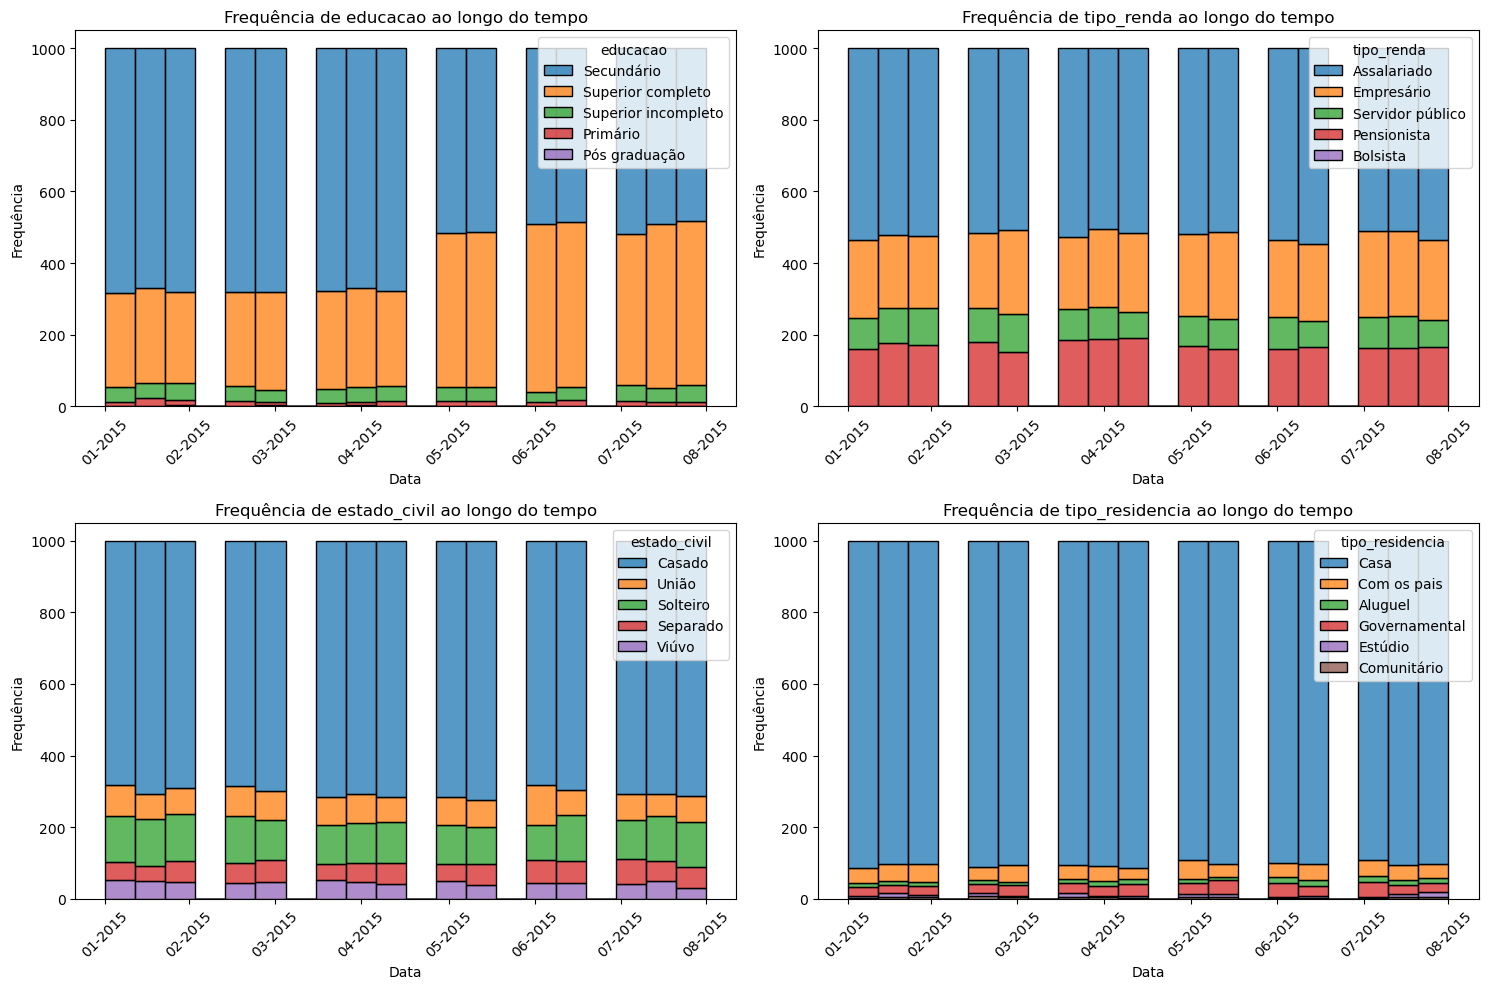

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Certificando que 'data_ref' está no formato de data
df_qualitativas['data_ref'] = pd.to_datetime(df_qualitativas['data_ref'], errors='coerce')

# Criar figura com subplots (2 linhas, 2 colunas)
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Lista de variáveis qualitativas
variaveis_qualitativas = ['educacao', 'tipo_renda', 'estado_civil', 'tipo_residencia']

# Gerar gráficos
for ax, var in zip(axes.flatten(), variaveis_qualitativas):
    sns.histplot(data=df_qualitativas, x="data_ref", hue=var, multiple="stack", ax=ax, bins=20)
    
    ax.set_title(f'Frequência de {var} ao longo do tempo')
    ax.set_xticklabels(df_qualitativas['data_ref'].dt.strftime("%m-%Y").unique(), rotation=45)
    ax.set_xlabel("Data")
    ax.set_ylabel("Frequência")

plt.tight_layout()
plt.show()


Podemos observar um padrão de crescimento na educação ao longo do tempo, e as outras variaves são muito estaveis dando a entender que independem do tempo decorrido.